# Proyecto de Pricing: Airbnb -Seattle

Elaborado por Marcela Huerfano en el marco del Diplomado en Inteligencia Artificial y Aprendizaje Profundo de la Universidad Nacional en 2020-II

Fecha de la última modificación: Sep 20 2020

# Contexto

## Base de Datos

Desde el 2.008 millones de usuarios alrededor del mundo usan la plataforma de Airbnb para buscar o publicitar espacios con el ánimo de arrendarlos, en la aplicación se observa la tarifa bruta junto con los valores variables como son impuestos, limpieza y depósito de seguridad. En [Kaggle](https://www.kaggle.com/airbnb/seattle) se encuentra disponible una base de esta plataforma que recopila datos para la ciudad de Seattle compuesta por:
* Listings:  Incluye la descripción completa y la evaluación por espacio
* Reviews: Incluye un valor único por cada evaluación y comentarios detallados
* Calendar: Incluye el precio y disponibilidad de espacio por día.

## Objetivo

Diseñar un modelo de pricing para la tarifación bruta del arrendamiento de un espacio dadas sus caracteristicas, utilizando algoritmos de Deep Learning.

# Análisis Exploratorio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmplot
import folium
from folium.plugins import FastMarkerCluster
import seaborn as sns
sns.set()

### -Listings
Esta base contiene 3.818 registros de espacios publicitados a los cuales se les asocian 92 columnas relacionadas con nueve tipos de variables:
1. Descripción
2. Arrendatario
3. Geolocalización
4. Características
5. Precios 
6. Valores Adicionales
7. Calificación
8. Licencia
9. Políticas




In [2]:
listings=pd.read_csv('listings.csv')

In [31]:
listings.info(max_cols=20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 90 entries, id to reviews_per_month
dtypes: float64(17), int64(13), object(60)
memory usage: 2.6+ MB


In [3]:
listings.shape, len(np.unique(listings['id']))

((3818, 92), 3818)

In [4]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

El porcentaje de datos faltantes es inferior a 20% en para el 88% de las columnas del dataset. Se remuven las dos columnas asociadas con el mayor porcentaje de no respuesta: license y square_feet.

In [5]:
pd.set_option("display.max_rows", 100)
is_na=listings.isna().sum().sort_values(ascending=False)
np.round(100*is_na/len(np.unique(listings['id'])),2)

license                             100.00
square_feet                          97.46
monthly_price                        60.27
security_deposit                     51.13
weekly_price                         47.38
notes                                42.06
neighborhood_overview                27.03
cleaning_fee                         26.98
transit                              24.46
host_about                           22.50
host_acceptance_rate                 20.25
review_scores_accuracy               17.23
review_scores_checkin                17.23
review_scores_value                  17.18
review_scores_location               17.16
review_scores_cleanliness            17.10
review_scores_communication          17.05
review_scores_rating                 16.95
reviews_per_month                    16.42
first_review                         16.42
last_review                          16.42
space                                14.90
host_response_time                   13.70
host_respon

In [6]:
listings=listings.drop(['license', 'square_feet' ], axis=1)

#### Distribución Espacial

Los espacios están distribuido a lo largo de la ciudad, sin embargo un 52.2% se concentran al interior de cinco vecindarios: Capitol Hill(14.9%), Downtown (13.9%), Central Area (9.7%), Queen Anne (7.7%) y Ballard (6%).

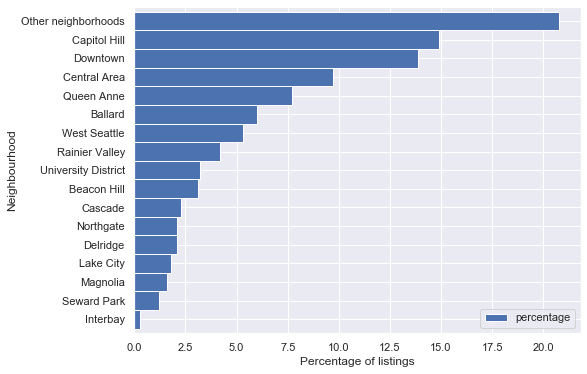

In [7]:
pivot = listings.pivot_table(index=['neighbourhood_group_cleansed'], values=['id'], aggfunc='count', margins=False)
pivot0=pivot.reset_index()
pivot0['percentage']= np.round(100* (pivot0['id']/pivot0['id'].sum()),1)

feq = pivot0[['neighbourhood_group_cleansed', 'percentage']].sort_values('percentage')
feq=feq.set_index('neighbourhood_group_cleansed')
feq.plot.barh(figsize=(8,6),  width= 1)
plt.xlabel('Percentage of listings', fontsize = 12)
plt.ylabel('Neighbourhood', fontsize = 12)
plt.show()

In [8]:
geo_location=listings[["latitude", "longitude"]]

In [9]:
locations = geo_location
map1 = folium.Map(location=[47.62, -122.33], zoom_start=12)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [10]:
map1.save('index.html')

#### Tipos de espacios

90.1% de los anuncios corresponden a casas (45.4%) y apartamentos (44.7%), seguidos por 3.1% de casas de campo y 2.4% de Condominios. En los vecindarios de Downtown, CapitolHill, Queen Anee y University District prevalecen los apartamentos sobre las casas, para los demas vecindarios la relación es invertida (más casas que apartamentos en una proporción similar.)

In [11]:
pivot = listings.pivot_table(index=['property_type'], values=['id'], aggfunc='count', margins=False)
pivot1=pivot.reset_index()
pivot1['percentage']= np.round(100* (pivot1['id']/pivot1['id'].sum()),1)
pivot1.sort_values('percentage', ascending=False)

,property_type,id,percentage
9,House,1733,45.4
0,Apartment,1708,44.7
13,Townhouse,118,3.1
7,Condominium,91,2.4
1,Bed & Breakfast,37,1.0
10,Loft,40,1.0
4,Cabin,21,0.6
11,Other,22,0.6
3,Bungalow,13,0.3
5,Camper/RV,13,0.3


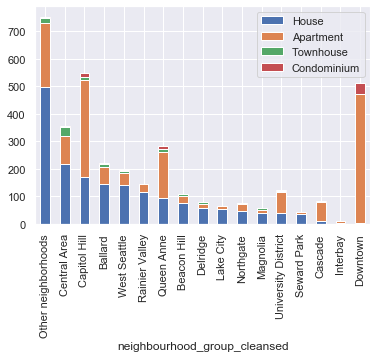

In [12]:
pivot = listings.pivot_table(index=['neighbourhood_group_cleansed'], columns=['property_type'],values=['id'], aggfunc='count', margins=False).fillna(0)
pivot.columns = pivot.columns.droplevel(0) #Remover el indice multilevel en las columnas
pivot = pivot.rename_axis(None, axis=1)
pivot=pivot.sort_values("House", ascending=False)
pivot[["House", "Apartment", "Townhouse", 'Condominium']].plot(kind="bar", stacked=True)
plt.show()

El 66.5% de los espacios listados corresponden a la locación completa bien sean casas o apartamentos, seguidos de 30.4% asociado a habitaciones privadas y solo un 3.1% de habitaciones compartidas 

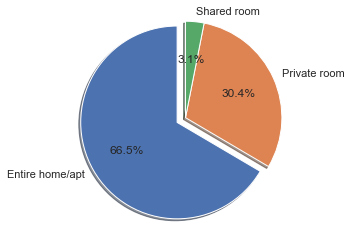

In [13]:
pivot = listings.pivot_table(index=['room_type'], values=['id'], aggfunc='count', margins=False)
pivot1=pivot.reset_index()
pivot1['percentage']= np.round(100* (pivot1['id']/pivot1['id'].sum()),1)
explode = (0.1, 0,0)
fig1, ax1 = plt.subplots()
ax1.pie(pivot1['percentage'], explode=explode, labels=pivot1['room_type'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [14]:
listings['price'] = listings['price'].str.replace("[$, ]", "").astype("float")
listings['extra_people'] = listings['extra_people'].str.replace("[$, ]", "").astype("float")


In [34]:
listings['host_response_rate']=listings['host_response_rate'].str.replace("%", "").astype("float")

In [35]:
df=listings[['bedrooms', 'bathrooms', 'beds','number_of_reviews','extra_people','host_response_rate','price', 'room_type']]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


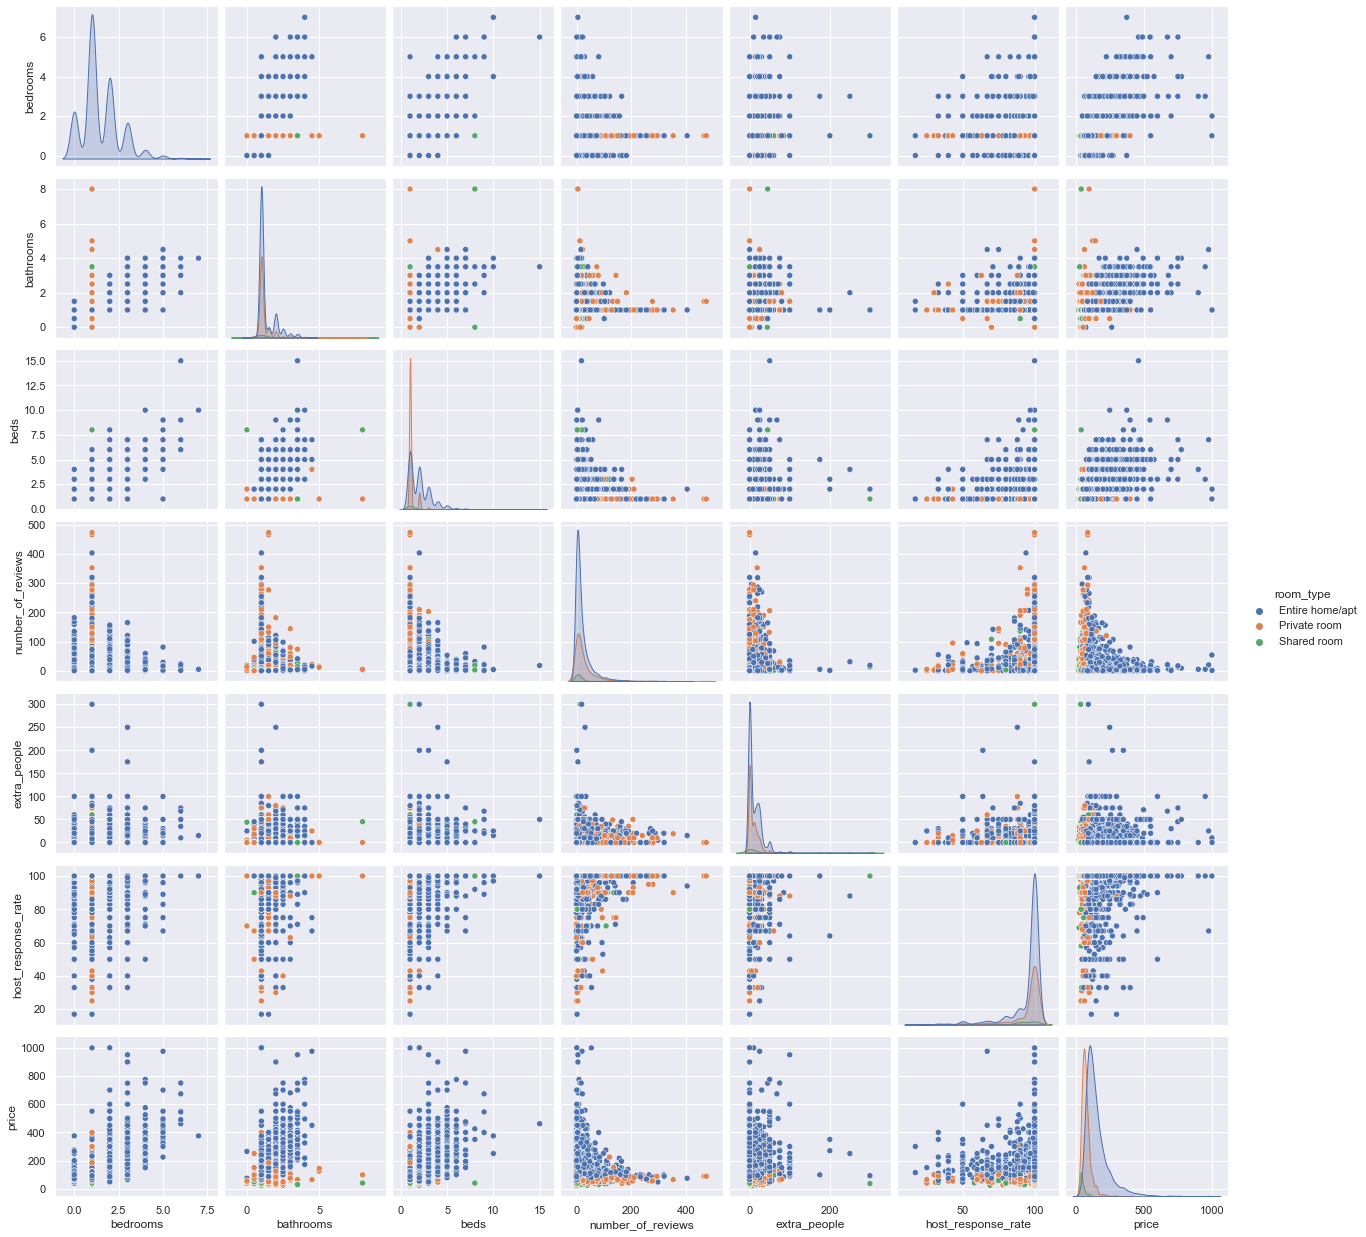

In [36]:
sns.pairplot(df,hue='room_type')
plt.show()

### Pricing

El precio por noche oscila entre 20 y 1.000 dolares. El promedio de precios es similar entre los diferentes tipos de propiedades. Las casas y apartamentos presentan la mayor cantidad de datos atípicos, sobresaliendo las casas por tener una mayor dispersión de precios en relación a los apartamentos. Los botes presentan la mayor diversificación de precios al interior de una misma categoría.

In [ ]:
print('Rango de precios:', max(listings['price']), 'y',  min(listings['price']))

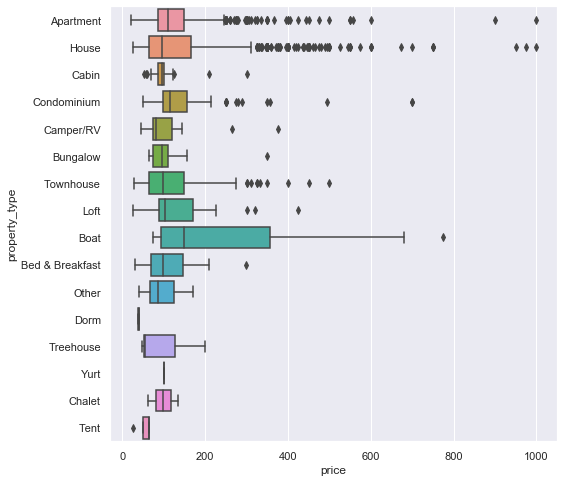

In [20]:
plt.figure(figsize=(8,8))
sns.boxplot(x="price", y="property_type", data=listings)
plt.show()

[]

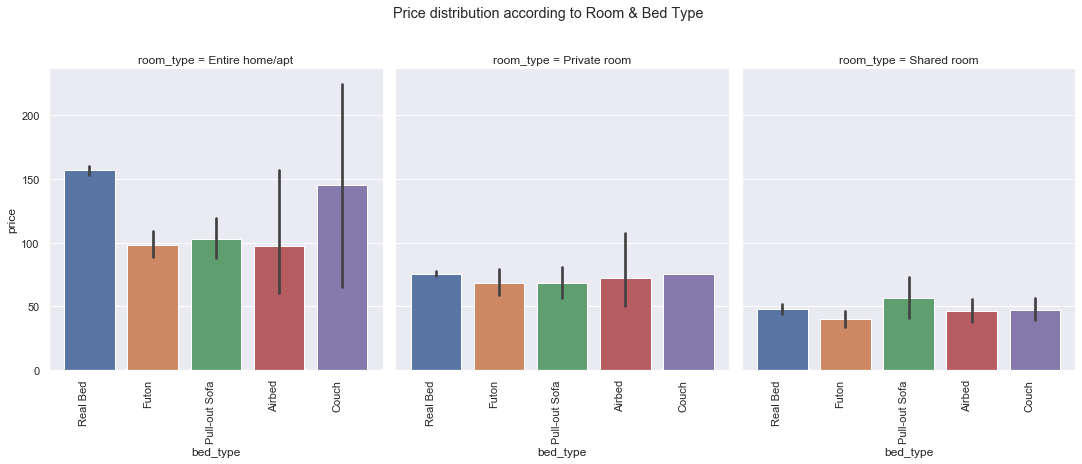

In [30]:
room_bed= sns.catplot(x='bed_type', y='price', col ='room_type', kind= 'bar', data=listings)
room_bed.set_xticklabels(rotation=90, horizontalalignment='right')
room_bed.fig.suptitle("\n".join(["Price distribution according to Room & Bed Type"]), y=1.1)
plt.plot()

### Cuál es el área más costosa?

In [ ]:
calendar=pd.read_csv('calendar.csv')

In [ ]:
calendar.head()

In [ ]:
reviews=pd.read_csv('reviews.csv')

In [ ]:
reviews.head()